In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
import datetime

In [2]:
df = pd.read_csv('results.csv')

In [3]:
df

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
...,...,...,...,...,...,...,...,...,...
41581,2020-01-10,Barbados,Canada,1,4,Friendly,Irvine,United States,True
41582,2020-01-12,Kosovo,Sweden,0,1,Friendly,Doha,Qatar,True
41583,2020-01-15,Canada,Iceland,0,1,Friendly,Irvine,United States,True
41584,2020-01-19,El Salvador,Iceland,0,1,Friendly,Carson,United States,True


In [4]:
#check for missing values
df.isnull()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
41581,False,False,False,False,False,False,False,False,False
41582,False,False,False,False,False,False,False,False,False
41583,False,False,False,False,False,False,False,False,False
41584,False,False,False,False,False,False,False,False,False


In [5]:
df.isnull().sum(axis = 0)

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

In [6]:
# How many tuples are there in the dataset? 41586
df.shape

(41586, 9)

In [7]:
# How many tournaments are there in the dataset? 111 (not including Friendlies)
df_tournaments = df["tournament"].unique()
print(df_tournaments)
print(len(df_tournaments))

['Friendly' 'British Championship' 'Copa Lipton' 'Copa Newton'
 'Copa Premio Honor Argentino' 'Copa Premio Honor Uruguayo' 'Copa Roca'
 'Copa América' 'Copa Chevallier Boutell' 'Nordic Championship'
 'International Cup' 'Baltic Cup' 'Balkan Cup' 'FIFA World Cup'
 'Copa Rio Branco' 'FIFA World Cup qualification' 'CCCF Championship'
 'NAFU Championship' 'Copa Oswaldo Cruz' 'Pan American Championship'
 'Copa del Pacífico' "Copa Bernardo O'Higgins"
 'AFC Asian Cup qualification' 'Atlantic Cup' 'AFC Asian Cup'
 'African Cup of Nations' 'Copa Paz del Chaco' 'Merdeka Tournament'
 'UEFA Euro qualification' 'UEFA Euro' 'Windward Islands Tournament'
 'African Cup of Nations qualification' 'Vietnam Independence Cup'
 'Copa Carlos Dittborn' 'CONCACAF Championship' 'Copa Juan Pinto Durán'
 'UAFA Cup' 'South Pacific Games' 'CONCACAF Championship qualification'
 'Copa Artigas' 'GaNEFo' "King's Cup" 'Gulf Cup' 'Indonesia Tournament'
 'Korea Cup' 'Brazil Independence Cup' 'Copa Ramón Castilla'
 'Oceani

In [25]:
# Convert the column date to timestamps!
df['year'] = pd.DatetimeIndex(df['date']).year
df['date'] = pd.to_datetime(df['date'],format='%Y-%m-%d')
df

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,1873
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,1875
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876
...,...,...,...,...,...,...,...,...,...,...
41581,2020-01-10,Barbados,Canada,1,4,Friendly,Irvine,United States,True,2020
41582,2020-01-12,Kosovo,Sweden,0,1,Friendly,Doha,Qatar,True,2020
41583,2020-01-15,Canada,Iceland,0,1,Friendly,Irvine,United States,True,2020
41584,2020-01-19,El Salvador,Iceland,0,1,Friendly,Carson,United States,True,2020


In [33]:
# Find out how many matches in the dataset were played in 2018.
# 905
df['year'].value_counts().head(15)

2019    1155
2008    1091
2011    1081
2004    1064
2000    1026
2001    1018
2012    1012
2015    1003
2007     978
2013     965
2017     958
2003     936
2016     926
2018     905
2009     897
Name: year, dtype: int64

In [46]:
# Calculate how many times the home team won, lost or had a draw.
wins = 0
draws = 0
losses = 0
for row in range(0,41586):
    if df.iloc[row]['home_score'] - df.iloc[row]['away_score'] > 0:
        wins += 1
    elif df.iloc[row]['home_score'] - df.iloc[row]['away_score'] == 0:
        draws += 1
    else:
        losses += 1

In [48]:
print(f'Wins {wins}')
print(f'Draws {draws}')
print(f'Losses {losses}')
print(f'Total {wins+draws+losses}')

Wins 20234
Draws 9578
Losses 11774
Total 41586


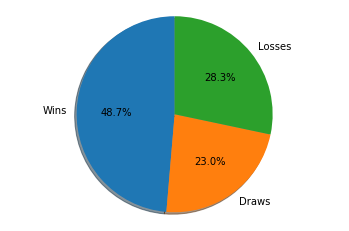

In [58]:
# Pie chart of W/L/D by Home Team
labels = 'Wins', 'Draws', 'Losses'
sizes = [wins, draws, losses]
explode = [0,0,0]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.show()

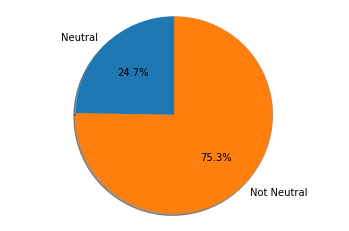

In [60]:
# Pie chart of Neutral Column
fc, tc = df['neutral'].value_counts().sort_index().tolist()
labels = 'Neutral', 'Not Neutral'
sizes = [tc, fc]
explode = [0,0]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.show()

In [82]:
#How many unique teams are there in the dataset? 312
print(pd.unique(df[['home_team', 'away_team']].values.ravel('K')))
len(pd.unique(df[['home_team', 'away_team']].values.ravel('K')))

['Scotland' 'England' 'Wales' 'Northern Ireland' 'United States' 'Uruguay'
 'Austria' 'Hungary' 'Argentina' 'Belgium' 'France' 'Netherlands'
 'Czechoslovakia' 'Switzerland' 'Sweden' 'Germany' 'Italy' 'Chile'
 'Norway' 'Finland' 'Luxembourg' 'Russia' 'Denmark' 'Catalonia'
 'Basque Country' 'Brazil' 'Japan' 'Paraguay' 'Canada' 'Estonia'
 'Costa Rica' 'Guatemala' 'Spain' 'Brittany' 'Poland' 'Yugoslavia'
 'New Zealand' 'Romania' 'Latvia' 'Galicia' 'Portugal' 'Andalusia'
 'China PR' 'Australia' 'Lithuania' 'Turkey' 'Central Spain' 'Mexico'
 'Aruba' 'Egypt' 'Haiti' 'Philippines' 'Bulgaria' 'Jamaica' 'Kenya'
 'Bolivia' 'Peru' 'Honduras' 'Guyana' 'Uganda' 'Belarus' 'El Salvador'
 'Barbados' 'Republic of Ireland' 'Trinidad and Tobago' 'Greece' 'Curaçao'
 'Dominica' 'Silesia' 'Guadeloupe' 'Israel' 'Suriname' 'French Guiana'
 'Cuba' 'Colombia' 'Ecuador' 'Saint Kitts and Nevis' 'Panama' 'Slovakia'
 'Manchukuo' 'Croatia' 'Nicaragua' 'Afghanistan' 'India' 'Martinique'
 'Zimbabwe' 'Iceland' 'Albania'

312